<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

# Machine Learning for $t\bar{t}Z$ in ATLAS 

<CENTER><img src="images/feynman_diagrams/ttZ_feynman.png" style="width:100%"></CENTER>

[mybinder.org/v2/gh/atlas-outreach-data-tools/notebooks-collection-opendata/no-root?filepath=13-TeV-examples/uproot_python/ttZ_ML_from_csv.ipynb](https://mybinder.org/v2/gh/atlas-outreach-data-tools/notebooks-collection-opendata/no-root?filepath=13-TeV-examples/uproot_python/ttZ_ML_from_csv.ipynb)

Run it yourself: [bit.ly/3sJsuAl](https://bit.ly/3sJsuAl)

This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to implement Machine Learning in the $t\bar{t}Z$ Opposite-sign dilepton analysis, loosely following the ATLAS published paper [Measurement of the $t\bar{t}Z$ and $t\bar{t}W$ cross sections in proton-proton collisions at $\sqrt{s}$ = 13 TeV with the ATLAS detector](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.072009).

The whole notebook takes less than an hour to follow through.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text

Notebooks are a perfect platform to develop Machine Learning for your work, since you'll need exactly those 3 things: code, visualisations and narrative text!

We're interested in Machine Learning because we can design an algorithm to figure out for itself how to do various analyses, potentially saving us countless human-hours of design and analysis work.

Machine Learning use within ATLAS includes: 
* particle tracking
* particle identification
* <span style="color:blue">signal</span>/<span style="color:red">background</span> classification
* and more!

This notebook will focus on signal/background classification.

By the end of this notebook you will be able to:
1. run machine learning algorithms to classify <span style="color:blue">signal</span> and <span style="color:red">background</span>
2. know some things you can change to improve your machine learning algorithms

Feynman diagram pictures are borrowed from our friends at https://www.particlezoo.net

## Introduction (from Section 1)

Properties of the top quark have been explored by the
Large Hadron Collider (LHC) and previous collider experiments in great detail, owing to the large center-of-mass energy and luminosity at the LHC.

Measurements of top-quark pairs in association with a Z boson ($t\bar{t}Z$) provide a direct probe of the
weak couplings of the top quark. These couplings
may be modified in the presence of physics beyond the
Standard Model (BSM). Measurements of the $t\bar{t}Z$ production cross sections, $\sigma_{t\bar{t}Z}$, can be used to
set constraints on the weak couplings of the top quark. 

The production of $t\bar{t}Z$ is often an important
background in searches involving final states with multiple
leptons and b-quarks. These processes also constitute an
important background in measurements of the associated
production of the Higgs boson with top quarks.

This paper presents measurements of the $t\bar{t}Z$ cross section using proton–proton (pp) collision data
at a center-of-mass energy $\sqrt{s}$ = 13 TeV.

The final states of top-quark pairs produced in association with a
Z boson contain up to 4 leptons. In this analysis, events with 2 opposite-sign
(OS) leptons are considered. The dominant <span style="color:red">backgrounds</span>
in this channel are Z+jets and $t\bar{t}$. 

(In this paper, lepton is used to denote electron or muon, and prompt lepton is used to denote a lepton produced in a Z boson decay, or in the decay of a τ-lepton which arises from a Z boson decay.)

## Data and simulated samples (from Section 3)

The data were collected with the ATLAS detector at a proton–proton (pp) collision
energy of 13 TeV. 

Monte Carlo (MC) simulation samples are used to model the expected <span style="color:blue">signal</span> and <span style="color:red">background</span> distributions. All samples were processed through the
same reconstruction software as used for the data. 

## Opposite-sign dilepton analysis (from Section 5A)

The OS dilepton analysis targets the $t\bar{t}Z$ process, where both top quarks decay hadronically and the Z boson
decays to a pair of leptons (electrons or muons). Events are required to have exactly two opposite-sign leptons.

The OS dilepton analysis is affected by large backgrounds from Z+jets or $t\bar{t}$ production, both characterized
by the presence of two leptons. 

## Contents: 

[Running a Jupyter notebook](#running) <br />
[To setup first time](#setupfirsttime) <br />
[To setup everytime](#setupeverytime) <br />
[Plot data](#plot_data) <br />
[Selections](#selections) <br />
[Correlations](#correlations) <br />
[Machine Learning setup](#ML_setup) <br />
[Overtraining check](#overtraining_check) <br />
[Performance](#ROC) <br />
[ML_output separation](#ML_output_separation) <br />
[ML output data distributions](#ML_output_data) <br />
[Going further](#going_further) <br />
[Conclusion](#conclusion) <br />

<a id='running'></a>

## Running a Jupyter notebook

To run the whole Jupyter notebook, in the top menu click Cell -> Run All.

To propagate a change you've made to a piece of code, click Cell -> Run All Below.

You can also run a single code cell, by using the keyboard shortcut Shift+Enter.

<a id='setupfirsttime'></a>

## First time setup on your computer (no need on mybinder)
This first cell only needs to be run the first time you open this notebook on your computer. 

If you close Jupyter and re-open on the same computer, you won't need to run this first cell again.

If you open on mybinder, you don't need to run this cell.

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade --user pip # update the pip package installer
!{sys.executable} -m pip install -U pandas sklearn --user # install required packages

<a id='setupeverytime'></a>

## To setup everytime

Cell -> Run All Below

to be done every time you re-open this notebook.

We're going to be using a number of tools to help us:
* [pandas](https://pandas.pydata.org/docs/user_guide/index.html): lets us store data as dataframes, a format widely used in Machine Learning
* [numpy](https://numpy.org/doc/stable/): provides numerical calculations such as histogramming
* [matplotlib](https://matplotlib.org/stable/contents.html): common tool for making plots, figures, images, visualisations

Let's read the csv data into a [pandas DataFrame (df)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) and then display it like a table.

In [1]:
import pandas as pd # to store data as dataframes
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting

csv_path = "http://opendata.atlas.cern/release/2020/documentation/visualization/CrossFilter/13TeV_ttZ.csv"
df_all = pd.read_csv(csv_path) # read all data into pandas DataFrame
df_all # print as table

,type,Channel,NJets,MET,Mll,LepDeltaPhi,LepDeltaR,SumLepPt,NBJets,weight
0,0,0,3,6.34,91.79,1.84,2.17,130.34,1,1.00000
1,0,1,4,37.98,91.45,2.83,2.94,40.73,0,1.00000
2,0,0,3,23.58,84.53,1.69,1.71,75.59,0,1.00000
3,0,1,3,29.51,91.30,1.87,1.90,87.42,0,1.00000
4,0,0,3,14.46,88.91,1.74,1.75,102.94,0,1.00000
...,...,...,...,...,...,...,...,...,...,...
344574,4,2,4,99.52,49.90,0.45,1.34,77.73,1,0.90914
344575,4,2,3,77.84,39.77,0.49,0.93,114.34,0,0.45335
344576,4,0,6,120.98,16.91,0.38,0.42,79.02,0,0.85475
344577,4,2,3,73.51,60.19,2.28,2.51,32.60,2,0.44073


It'd be better to visualise this DataFrame in graphs, rather than a table. 

Let's start by defining a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) to distinguish between the different processes.

In [2]:
samples_SR = {

    0: { # type==0 is measured 'Data'
        'name': 'Data'
    },
    
    4: { # type==4 is 'Other' small backgrounds
        'name': 'Other',
        'color' : 'green'                                                                                                                                                                  
    },  
    
    3: { # type==3 is 'Z' background
        'name': 'Z', 
        'color' : 'red'
    }, 
    
    2: { # type==2 is 'tt' (top+antitop) background
        'name': 'tt',
        'color' : 'lightgrey'
    },  
    
    1: { # type==1 is 'ttZ' (top+antitop+Z) signal
        'name': 'ttZ',
        'color' : 'blue'
    },                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
    
}

<a id='plot_data'></a>

## Plot data

We need to define a function to plot any variable, to see the distributions of the simulated and measured data

In [3]:
def plot_data(data, x_variable, samples_to_plot=samples_SR):
     
    min_x = min(data[x_variable]) # minimum x-value for this variable
    max_x = max(data[x_variable]) # maximum x-value for this variable
    step_x = (max_x-min_x)/10 # step size in x-value for this variable
    
    bin_edges = np.arange(start=min_x, # The interval includes this value
                          stop=max_x+step_x, # The interval doesn't include this value
                          step=step_x ) # Spacing between values
    bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2

    mc_x = [] # define list to hold the MC x values
    mc_weights = [] # define list to hold the MC weights
    mc_colors = [] # define list to hold the MC bar colors
    mc_labels = [] # define list to hold the MC legend labels

    mc_stat_err_squared = np.zeros(len(bin_centres)) # define array to hold the MC statistical uncertainties
    for s in samples_to_plot: # loop over samples
        if s!=0: # if not data
            mc_x.append(data[data['type']==s][x_variable])
            mc_weights.append(data[data['type']==s]['weight'])
            mc_colors.append( samples_to_plot[s]['color'] ) # append to the list of Monte Carlo bar colors
            mc_labels.append( samples_to_plot[s]['name'] ) # append to the list of Monte Carlo legend labels 
            weights_squared,_ = np.histogram(data[data['type']==s][x_variable], bins=bin_edges,
                                             weights=data[data['type']==s]['weight']**2) # square the weights
            mc_stat_err_squared = np.add(mc_stat_err_squared,weights_squared) # add weights_squared for s 

    # plot the Monte Carlo bars
    mc_heights = plt.hist(mc_x, bins=bin_edges, 
                          weights=mc_weights, stacked=True, 
                          color=mc_colors, label=mc_labels )

    mc_x_tot = mc_heights[0][-1] # stacked background MC y-axis value
    mc_x_err = np.sqrt( mc_stat_err_squared ) # statistical error on the MC bars

    # histogram the data
    data_x,_ = np.histogram(data[data['type']==0][x_variable], bins=bin_edges ) 

    # statistical error on the data
    data_x_errors = np.sqrt(data_x)

    # plot the data points
    plt.errorbar(x=bin_centres, 
                 y=data_x, 
                 yerr=data_x_errors,
                 fmt='ko', # 'k' means black and 'o' is for circles 
                 label='Data')

    # plot the statistical uncertainty
    plt.bar(bin_centres, # x
            2*mc_x_err, # heights
            alpha=0.5, # half transparency
            bottom=mc_x_tot-mc_x_err, color='none', 
            hatch="////", width=step_x, label='Unc.' )

    # x-axis label
    plt.xlabel(x_variable)

    # y-axis label
    plt.ylabel('Events')

    # draw the legend
    plt.legend() # number of columns

Let's take a look at the variable `Mll`.

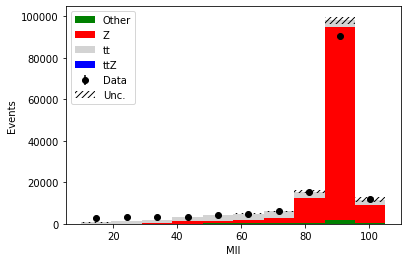

In [4]:
plot_data(df_all, x_variable='Mll')

We can't see <span style="color:blue">signal</span> anywhere...

<a id='selections'></a>

## Selections

We make selections to focus on <span style="color:blue">signal</span>, then print the selected DataFrame's rows.

<CENTER><img src="images/selections_meme.jpeg" style="width:80%"></CENTER>

In [5]:
df_selected = df_all[(df_all['Channel']!=2) & # select events that aren't in the Channel 'emu'
                     (df_all['NJets']>=5) & # at least 5 jets
                     (df_all['NBJets']>=1) & # at least 1 b-tagged jets
                     (df_all['Mll']>81.12) & # Z-boson mass - 10 GeV
                     (df_all['Mll']<101.12) # Z-boson mass + 10 GeV
                    ]
df_selected # print as table

,type,Channel,NJets,MET,Mll,LepDeltaPhi,LepDeltaR,SumLepPt,NBJets,weight
7,0,1,6,25.80,91.90,2.35,2.39,37.51,1,1.00000
40,0,1,5,12.21,92.20,2.94,2.94,37.22,1,1.00000
44,0,1,5,25.10,88.14,2.15,2.59,46.19,2,1.00000
124,0,0,7,49.99,92.49,0.57,1.50,145.59,1,1.00000
182,0,0,5,42.82,91.80,2.84,2.84,14.16,2,1.00000
...,...,...,...,...,...,...,...,...,...,...
344416,4,0,5,31.92,90.50,1.27,2.26,62.63,1,0.22986
344448,4,0,7,59.72,94.34,2.63,2.76,73.35,1,0.25186
344478,4,0,5,41.16,92.18,1.40,1.53,115.42,1,0.22737
344552,4,1,7,14.24,89.51,1.61,1.69,93.50,1,0.36640


Now if we take another look at `Mll`, we can see the <span style="color:blue">signal</span> a bit easier.

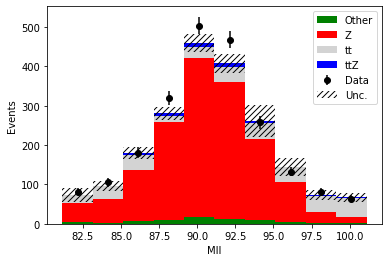

In [6]:
plot_data(df_selected, x_variable='Mll')

We can also look at other variables.

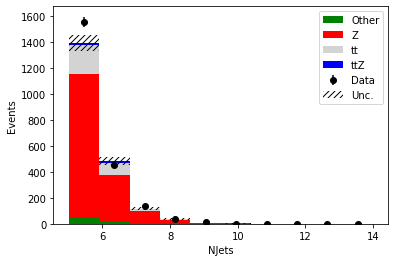

In [7]:
plot_data(df_selected, x_variable='NJets')

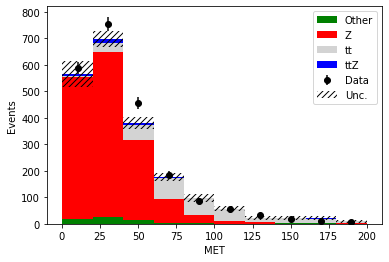

In [8]:
plot_data(df_selected, x_variable='MET')

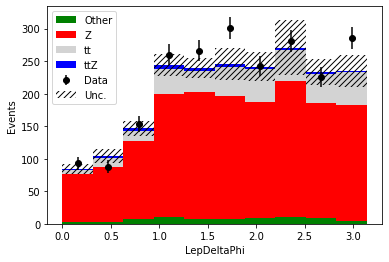

In [9]:
plot_data(df_selected, x_variable='LepDeltaPhi')

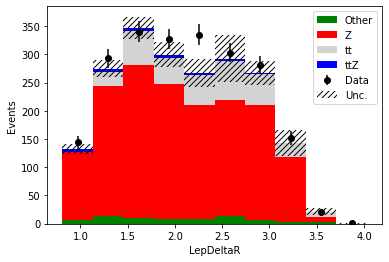

In [10]:
plot_data(df_selected, x_variable='LepDeltaR')

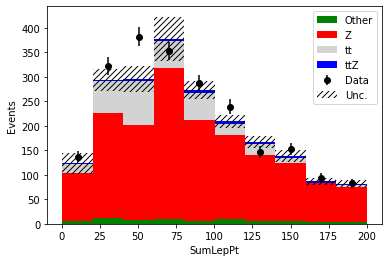

In [11]:
plot_data(df_selected, x_variable='SumLepPt')

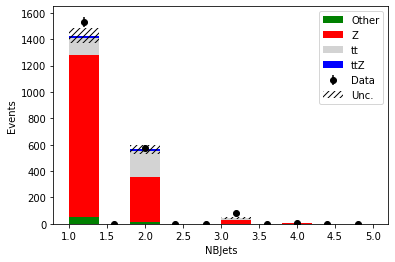

In [12]:
plot_data(df_selected, x_variable='NBJets')

They look nice, but there's a problem.

Wherever you may see a bit of <span style="color:blue">signal</span>, it's covered by the Uncertainty band. 

This means that the extra area covered by the <span style="color:blue">signal</span> could just be statistical fluctuations of the background processes. Hmm...

<a id='separations'></a>

## Separation

Let's see how well <span style="color:blue">signal</span> & <span style="color:red">background</span> are separated for each variable, using simulation.

<CENTER><img src="images/separation_meme.jpeg" style="width:70%"></CENTER>

In [13]:
def plot_separation(data, x_variable, samples_to_plot=samples_SR):
    
    min_x = min(data[x_variable]) # minimum x-value for this variable
    max_x = max(data[x_variable]) # maximum x-value for this variable
    step_x = (max_x-min_x)/10 # step size in x-value for this variable
    
    bin_edges = np.arange(start=min_x, # The interval includes this value
                          stop=max_x+step_x, # The interval doesn't include this value
                          step=step_x ) # Spacing between values

    # clip signal underflow and overflow into x-axis range
    signal_x = data[data['type']==1][x_variable]

    mc_x = [] # define list to hold the MC histogram entries
    for s in samples_to_plot: # loop over samples
        if s!=0 and s!=1: # if not data nor signal
            mc_x = [*mc_x, # mc_x for previous sample
                    *data[data['type']==s][x_variable] ] # this sample


    main_axes = plt.gca() # get current axes

    # plot the background Monte Carlo distribution
    mc_heights = plt.hist(mc_x, 
                          bins=bin_edges,
                          density=True, # normalise the histogram
                          histtype='step', color='red', 
                          label='background' )

    # plot the signal distribution
    signal_heights = plt.hist(signal_x,  
                              bins=bin_edges,
                              density=True, # normalise the histogram 
                              histtype='step', color='blue', 
                              label='signal', 
                              linestyle='--' ) # dashed line

    bin_width = (max(data[x_variable])-min(data[x_variable]))/10
    separation = 0 # start separation counter at 0
    nstep  = 10 # number of bins
    nS     = sum(signal_heights[0])*bin_width # signal integral
    nB     = sum(mc_heights[0])*bin_width # background integral
    for bin_i in range(nstep): # loop over each bin
        s = signal_heights[0][bin_i]/nS # normalised signal in bin_i
        b = mc_heights[0][bin_i]/nB # normalised background in bin_i
        if (s + b > 0): separation += (s - b)*(s - b)/(s + b) # separation
    separation *= 0.5*bin_width # multiply by 0.5 x bin_width 

    # x-axis label
    plt.xlabel(x_variable )

    # y-axis label
    plt.ylabel('Normalised units') 

    # draw the legend
    plt.legend() # no box around the legend
    
    plt.title(str(round(separation*100,1))+'% Separation between signal and background')
    
    plt.show() # show the Signal and background distributions
    
    
    # *************
    # Signal to background ratio
    # *************
    plt.figure() # start new figure
    SoverB = [] # list to hold S/B values
    for cut_value in bin_edges: # loop over bins
        signal_weights_passing_cut = sum(data[(data['type']==1) & (data[x_variable]>cut_value)].weight)
        background_weights_passing_cut = 0 # start counter for background weights passing cut
        for s in [2,3,4]: # loop over background samples
            background_weights_passing_cut += sum(data[(data['type']==s) & (data[x_variable]>cut_value)].weight)
        if background_weights_passing_cut!=0: # some background passes cut
            SoverB_value = signal_weights_passing_cut/background_weights_passing_cut
            SoverB_percent = 100*SoverB_value # multiply by 100 for percentage
            SoverB.append(SoverB_percent) # append to list of S/B values

    plt.plot( bin_edges[:len(SoverB)], SoverB ) # plot the data points
    plt.ylim( bottom=0 ) # set the x-limit of the main axes
    plt.ylabel( 'S/B (%)' ) # write y-axis label for main axes
    plt.title('signal:background ratio for different '+x_variable+' selection values')
    plt.xlabel( x_variable ) # x-axis label 

    plt.show() # show S/B plot


Let's take a look at those input variables

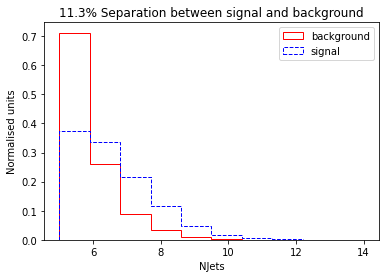

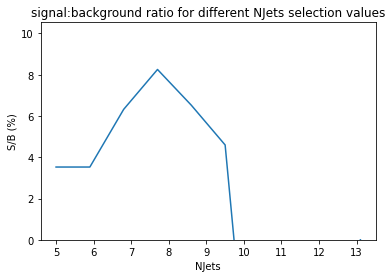

In [14]:
plot_separation(df_selected, x_variable='NJets')

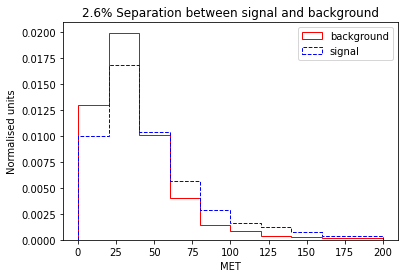

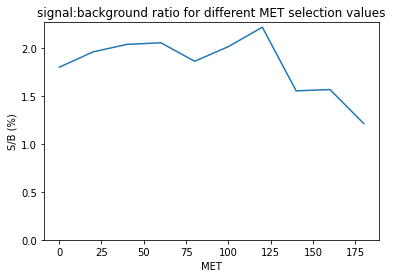

In [15]:
plot_separation(df_selected, x_variable='MET')

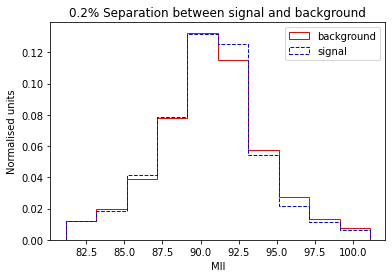

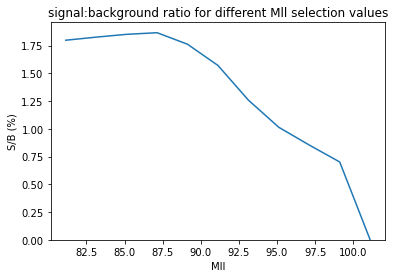

In [16]:
plot_separation(df_selected, x_variable='Mll')

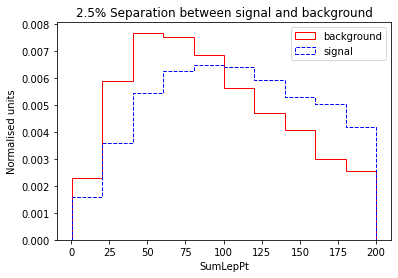

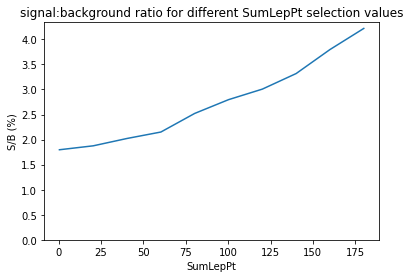

In [17]:
plot_separation(df_selected, x_variable='SumLepPt')

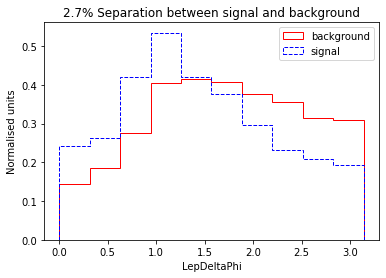

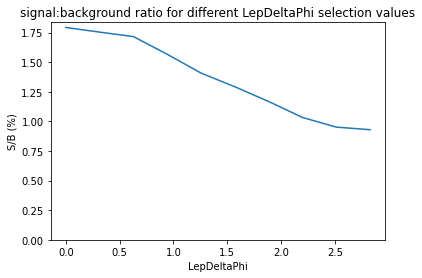

In [18]:
plot_separation(df_selected, x_variable='LepDeltaPhi')

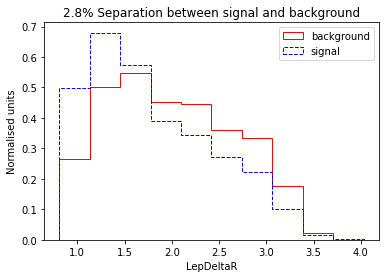

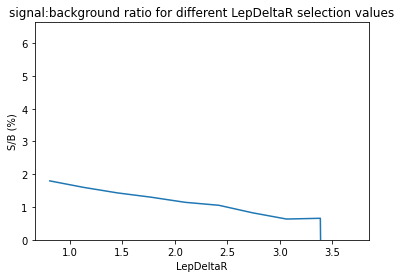

In [19]:
plot_separation(df_selected, x_variable='LepDeltaR')

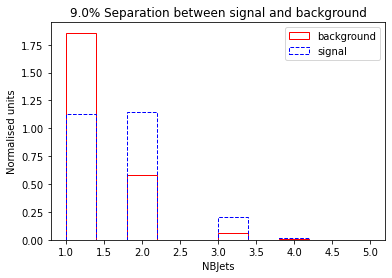

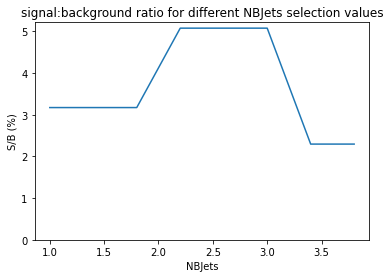

In [20]:
plot_separation(df_selected, x_variable='NBJets')

Hmm... some of those separations and <span style="color:blue">S</span>/<span style="color:red">B</span> are helpful, but could we achieve higher separation and <span style="color:blue">S</span>/<span style="color:red">B</span>?

With Machine Learning, the answer is yes!

<a id='correlations'></a>

## Correlations

It'd be nice if we could use all variables in our ML technique.

But, we can't use `Mll` since we selected values around the Z mass; using it &#8594; overtraining.

To be sure we can use all the others, we need to check the correlations between them.

If a pair of variables is fully correlated (=1.0), using both wouldn't add any new info.

<CENTER><img src="images/correlation_meme.jpeg" style="width:80%"></CENTER>

In [21]:
ML_inputs = ['NJets','NBJets','MET','LepDeltaPhi','LepDeltaR','SumLepPt']

def correlations(data):
    """Calculate pairwise correlation between features.
    
    Extra arguments are passed on to DataFrame.corr()
    """
    # simply call df.corr() to get a table of
    # correlation values if you do not need
    # the fancy plotting
    corrmat = data.corr()
    
    heatmap1 = plt.pcolor(corrmat) # get heatmap
    plt.colorbar(heatmap1) # plot colorbar

    plt.title("correlations") # set title

    x_variables = corrmat.columns.values # get variables from data columns
    
    plt.xticks(np.arange(len(x_variables))+0.5, x_variables, rotation=60) # x-tick for each label
    plt.yticks(np.arange(len(x_variables))+0.5, x_variables) # y-tick for each label

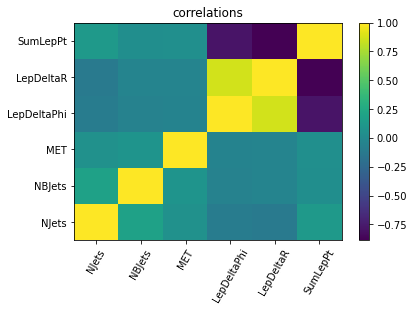

In [22]:
correlations(df_selected[ML_inputs]) # plot correlation matrix

No variable pair is correlated > ~0.75, so we can use each variable :)

<a id='ML_setup'></a>

## Machine Learning setup

Now we need to organise data ready for ML.

<CENTER><img src="images/ML_meme.jpeg" style="width:60%"></CENTER>

In [23]:
df_measured = df_selected[df_selected['type']==0] # measured data has type==0
df_simulated = df_selected[df_selected['type']!=0] # simulated data has type!=0

# for sklearn data is usually organised                                                                                                                                           
# into one 2D array of shape (n_samples x n_features)                                                                                                                             
# containing all the data and one array of categories                                                                                                                             
# of length n_samples  

X = df_simulated[ML_inputs] # concatenate the list of MC dataframes into a single 2D array of features, called X
y = np.concatenate([np.ones(df_simulated[df_simulated['type']==1].shape[0]), 
                    np.zeros(df_simulated[df_simulated['type']!=1].shape[0])]) # concatenate the list of lables into a single 1D array of labels, called y

# One of the first things to do is split your data into a training and testing set. 
# This will split your data into train-test sets: 75%-25%. 
# It will also shuffle entries so you will not get the first 75% of X for training and the last 25% for testing. 
# This is particularly important in cases where you load all signal events first and then the background events.

# Here we split our data into two independent samples. 
# The split is to create a training and testing set. 
# The first will be used for training the classifier and the second to evaluate its performance.

# We don't want to test on events that we used to train on, 
# this prevents overfitting to some subset of data so the network would be good for the test data but much worse at any *new* data it sees.

from sklearn.model_selection import train_test_split

# make train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=7 )

# A neural network may have difficulty converging before the maximum number of iterations if the data is not 
# normalized. 
# Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. 
# Note that you must apply the same scaling to the test set for meaningful results. 
# There are a lot of different methods for normalization of data, 
# we will use the built-in StandardScaler for standardization.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialise StandardScaler

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

# We'll use SciKit Learn (sklearn) in this tutorial. Other possible tools include keras and pytorch. 

# After initialising our MLPClassifier, call the .fit() method with the training sample as an argument. 
# This will train the tree. 

from sklearn.neural_network import MLPClassifier

ml_classifier = MLPClassifier(random_state=7) # initialise classifier
ml_classifier.fit(X_train, y_train) # fit MVA to training set

# Now we are ready to evaluate the performance on the held out testing set.

df_with_ML = df_selected.copy() # copy selected DataFrame to be able to add new column
ml_output_list = [] # start list to hold ML outputs
for s in [0,1,2,3,4]: # loop over samples
    X_s = df_selected[df_selected['type']==s][ML_inputs] # get the MVA input features
    X_s = scaler.transform(X_s) # apply scaling
    ml_output_on_X_s = ml_classifier.predict_proba(X_s)[:, 1] # get decision function for this sample
    ml_output_list.append(ml_output_on_X_s) # append to list of ML outputs
ml_output_array = np.concatenate(ml_output_list) # concatenate into one array
df_with_ML['ML_output'] = ml_output_array # save new column

<a id='overtraining_check'></a>

## Overtraining check

In this section we will check whether there has been any overtraining.

<CENTER><img src="images/overtraining_meme.jpeg" style="width:40%"></CENTER>

In [24]:
def compare_train_test(clf, X_train, y_train, X_test, y_test):
    decisions = [] # list to hold decisions of classifier
    for X,y in ((X_train, y_train), (X_test, y_test)): # train and test
        d1 = clf.predict_proba(X[y>0.5])[:, 1] # signal
        d2 = clf.predict_proba(X[y<0.5])[:, 1] # background
        decisions += [d1, d2] # add to list of classifier decision
        
    low = min(np.min(d) for d in decisions) # get minimum score
    high = max(np.max(d) for d in decisions) # get maximum score
    low_high = (low,high) # tuple holding score range
    
    # plot the test set background
    background_test_heights = plt.hist(decisions[3], # background in test set
                                       range=low_high, # lower and upper range of the bins
                                       density=True, # area under the histogram will sum to 1
                                       color='red', label='B (test)', # Background (test)
                                       alpha=0.5 ) # half transparency
    
    # plot the test set signal
    signal_test_heights = plt.hist(decisions[2], # signal in test set
                                   range=low_high, # lower and upper range of the bins
                                   density=True, # area under the histogram will sum to 1
                                   color='blue', label='S (test)', # Signal (test)
                                   alpha=0.5 ) # half transparency

    # histogram the training set background
    background_train_hist, bin_edges = np.histogram(decisions[1], # training background
                                                    range=low_high, # lower & upper range of the bins
                                                    density=True ) # area under the histogram will sum to 1
    
    # get scale between raw and normalised training background
    background_scale = len(decisions[1]) / sum(background_train_hist) 
    
    # get statistical error on background training set
    background_train_err = np.sqrt(background_train_hist * background_scale) / background_scale
    
    center = (bin_edges[:-1] + bin_edges[1:]) / 2 # bin centres
    
    # plot training set background
    plt.errorbar(x=center, y=background_train_hist, yerr=background_train_err, fmt='ro', # red circles
                 label='B (train)' ) # Background (train)

    # histogram the training set signal
    signal_train_hist, bin_edges = np.histogram(decisions[0], # training signal
                                                range=low_high, # lower & upper range of the bins
                                                density=True ) # area under the histogram will sum to 1
    
    # get scale between raw and normalised training signal
    signal_scale = len(decisions[0]) / sum(signal_train_hist) 
    
    # get statistical error on signal training set
    signal_train_err = np.sqrt(signal_train_hist * signal_scale) / signal_scale
    
    # plot training set signal
    plt.errorbar(x=center, y=signal_train_hist, yerr=signal_train_err, fmt='b*', # blue stars
                 label='S (train)' ) # Signal (train)

    plt.xlabel("ML output") # write x-axis units
    plt.ylabel("Normalised units") # write y-axis units
    plt.legend() # draw legend
    plt.title('overtraining check') # add title to plot

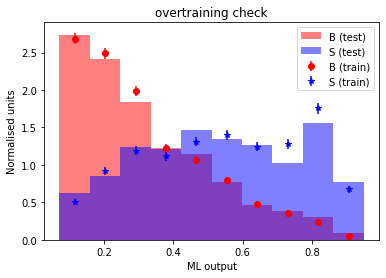

In [25]:
compare_train_test(ml_classifier, X_train, y_train, X_test, y_test)

If overtraining were present, the dots (test set) would be very far from the bars (training set).

Within uncertainties, our dots are in reasonable agreement with our bars, so we can proceed :)

<a id='ROC'></a>

## Performance

A useful plot to judge the performance of a classifier is to look at the ROC curve directly.

<CENTER><img src="images/ROC_meme.jpeg" style="width:100%"></CENTER>

In [26]:
from sklearn.metrics import roc_curve

# define function to plot ROC curve
def roc(clf, X_train, y_train, X_test, y_test): 
    train_decisions = clf.predict_proba(X_train)[:, 1] # get probabilities on train set
    test_decisions = clf.predict_proba(X_test)[:, 1] # get probabilities on test set
        
    # Compute ROC curve for training set
    train_fpr, train_tpr, _ = roc_curve(y_train, # actual
                                        train_decisions ) # predicted
    
    # plot train ROC curve
    plt.plot(train_fpr, # x
             train_tpr, # y
             label='Train', color='orange' )

    # Compute ROC curve for test set
    test_fpr, test_tpr, _ = roc_curve(y_test, # actual
                                      test_decisions ) # predicted
    
    # plot test ROC curve
    plt.plot(test_fpr, # x
             test_tpr, # y
             label='Test', color='purple' )
    
    plt.xlabel('False Positive Rate') # add x-axis label
    plt.ylabel('True Positive Rate') # add y-axis label
    plt.title('ROC curve') # add title
    plt.legend() # draw legend

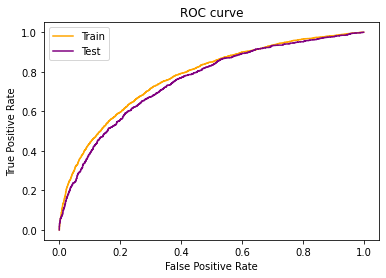

In [27]:
roc(ml_classifier, X_train, y_train, X_test, y_test) # plot ML ROC

The fact that the <span style="color:orange">train</span> and <span style="color:purple">test</span> curves overlap is another indication that overtraining isn't present.

The better the classifier, the more the curves will lie towards the top left.

<a id='ML_output_separation'></a>

## ML_output separation

Let's look at how well `ML_output` separates between <span style="color:blue">signal</span> and <span style="color:red">background</span>.

<CENTER><img src="images/ML_output_separation_meme.jpeg" style="width:40%"></CENTER>

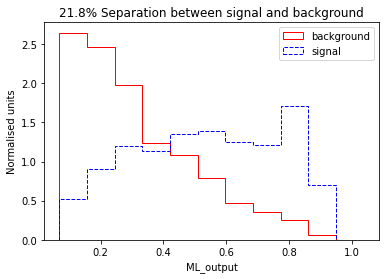

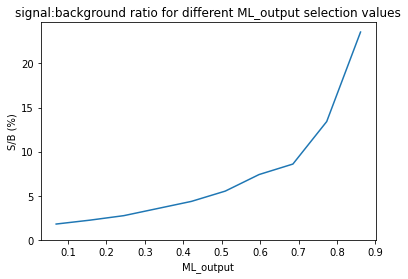

In [28]:
plot_separation(df_with_ML, x_variable='ML_output')

This separation and <span style="color:blue">S</span>/<span style="color:red">B</span> is better than any of the individual variables could ever have achieved, nice!

<a id='ML_output_data'></a>

## ML_output data distributions

Now we can take a look at the combined measured & simulated `ML_output` distribution.

<CENTER><img src="images/ML_output_data_meme.jpeg" style="width:50%"></CENTER>

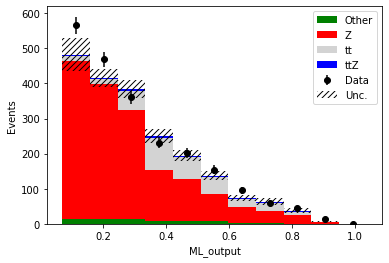

In [29]:
plot_data(df_with_ML, x_variable='ML_output')

Hmm... <span style="color:blue">signal</span> is still covered by the Uncertainty...

## How does $t\bar{t}Z$ look?

Looking at the diagram for <span style="color:blue">signal</span>, we expect at least 6 jets, including at least 2 b-jets.

<CENTER><img src="images/feynman_diagrams/ttZ_diagram.png" style="width:27%"></CENTER>

Let's make a further selection for >=6 jets & >=2 b-jets, then see how `ML_output` looks.

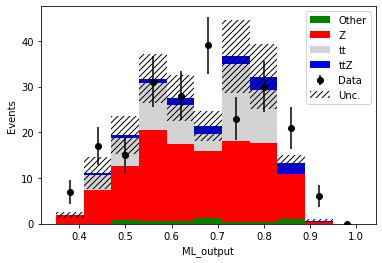

In [30]:
post_selected_df = df_with_ML[(df_with_ML['NJets']>=6) & # select at least 6 jets
                              (df_with_ML['NBJets']>=2)] # select at least 2 b-jets

plot_data(post_selected_df, x_variable='ML_output')

We can finally see a little bit of <span style="color:blue">signal</span> not covered by Uncertainty between 0.8-0.9 in `ML_output`

We can completely eliminate <span style="color:gray">tt background</span> and achieve <span style="color:blue">S</span>/<span style="color:red">B</span>~15% by selecting `ML_output>0.8`.

<a id='going_further'></a>

## Going further

Improvement can be made, but this technique of isolating <span style="color:blue">signal</span> at high `ML_output` will allow us to make precise measurements of the <span style="color:blue">signal</span> process.

Maybe you'd like to try some of these improvements?

There are a number of things you could try: 

* **Try different selections** in '[Selections](#selections)'. 
* **Add `Mll` in `ML_inputs`** in '[Correlations](#correlations)'. Does it lead to overtraining? 
* **Try a different train_test_split** than the default 75% in '[Machine Learning setup](#ML_setup)'. You may find the [sklearn documentation on train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) helpful. Does it change the results?
* **Try a different scaler** than `StandardScaler` in '[Machine Learning setup](#ML_setup)'. You may find the [sklearn documentation on preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) helpful.
* **Try other machine learning algorithms** than `MLPClassifier` in '[Machine Learning setup](#ML_setup)'. You may find [sklearn documentation on supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) helpful.
* **Modify classifier hyperparameters** in '[Machine Learning setup](#ML_setup)'. For `MLPClassifier`, you may find [sklearn documentation on `MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) helpful.

With each change, keep an eye on the data distributions, separations, correlations, overtraining and ROC. 

Let us know if you find high separations and performance! As long as there isn't overtraining of course ;)

<a id='conclusion'></a>



## Conclusion

Chucking everything into machine learning means we only have 1 variable to optimise. 

<span style="color:blue">Signal</span> and <span style="color:red">background</span> distributions are separated more when looking at ML output. 

Machine learning achieves higher <span style="color:blue">S</span>/<span style="color:red">B</span> than individual variables, because it finds multi-dimension correlations that give better <span style="color:blue">S</span>/<span style="color:red">B</span> classification.

Hope you've enjoyed this notebook on Machine Learning <span style="color:blue">signal</span> v <span style="color:red">background</span> classification!

<CENTER><img src="images/conclusion_meme.jpeg" style="width:100%"></CENTER>